<a href="https://colab.research.google.com/github/CseMony/MY_thesis/blob/main/vgg_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from skimage import io
import pandas as pd
import os
from skimage.color import rgb2gray
from skimage import data, color, exposure
from PIL import Image

dataset_path = '/gdrive/My Drive/gt_db'

dataset_dir  = os.listdir(dataset_path)
count=0 
training_data=[]
img_size=224
train_path='/gdrive/My Drive/cropped_faces'
#class_num=13233
def create_training_data():
  
                    
  for i in os.listdir(dataset_path):
      path=['/gdrive/My Drive/gt_db/'+i]
      #print(path)
      for j in path: 
        #print(i)
          directory  = os.listdir(j)
          for k in directory:
            filename=j+'/'+k
            if k.endswith(".jpg"):
              img = io.imread(filename)
              #print(filename)
              cls = filename.split("/")[4]
              class_num=cls[1]+cls[2]
              class_num=int(class_num)
              class_num=class_num-1
              #print(class_num)
              
              new_array=cv2.resize(img,(img_size,img_size),3)
              training_data.append([new_array,class_num])
            
create_training_data()  

In [ ]:
X=[]
y=[]
for feature,label in training_data:
  X.append(feature)
  y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,3) 
y = np.array(y).reshape(-1, 1) 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,stratify=y,random_state=42)

In [ ]:
from tensorflow.keras import backend
from tensorflow import keras
from keras import regularizers
from keras.regularizers import l2,l1
#Instantiate an empty model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
model = Sequential()
model.add(keras.layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu",kernel_initializer='glorot_uniform'))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu",kernel_initializer='glorot_uniform'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu",kernel_initializer='glorot_uniform'))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu",kernel_initializer='glorot_uniform'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu",kernel_initializer='glorot_uniform'))
model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu",kernel_initializer='glorot_uniform'))
model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu",kernel_initializer='glorot_uniform'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",kernel_initializer='glorot_uniform'))
model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",kernel_initializer='glorot_uniform'))
model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",kernel_initializer='glorot_uniform'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",kernel_initializer='glorot_uniform'))
model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",kernel_initializer='glorot_uniform'))
model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",kernel_initializer='glorot_uniform'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=4096,activation="relu"))
model.add(keras.layers.Dense(units=4096,activation="relu"))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(units=50, activation="softmax"))

In [ ]:
from keras.optimizers import Adam
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(lr=0.0001,decay=0.001), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=2, verbose=1, mode='auto')
hist = model.fit(X_train,y_train,steps_per_epoch=30, validation_data= (X_test,y_test), validation_steps=2,epochs=15,callbacks=[checkpoint,early])


Epoch 1/15
30/30 [==============================] - 1158s 39s/step - loss: 4.1772 - accuracy: 0.0142 - val_loss: 3.9033 - val_accuracy: 0.1400
Epoch 2/15
30/30 [==============================] - 1137s 38s/step - loss: 3.8349 - accuracy: 0.0979 - val_loss: 2.8306 - val_accuracy: 0.3200
Epoch 3/15
30/30 [==============================] - 1133s 38s/step - loss: 2.3931 - accuracy: 0.3466 - val_loss: 1.7838 - val_accuracy: 0.5733
Epoch 4/15
30/30 [==============================] - 1122s 37s/step - loss: 1.1903 - accuracy: 0.6553 - val_loss: 0.6855 - val_accuracy: 0.8400
Epoch 5/15
30/30 [==============================] - 1174s 39s/step - loss: 0.4503 - accuracy: 0.8767 - val_loss: 0.2037 - val_accuracy: 0.9733
Epoch 6/15
30/30 [==============================] - 1133s 38s/step - loss: 0.1404 - accuracy: 0.9611 - val_loss: 0.3150 - val_accuracy: 0.9400
Epoch 7/15
30/30 [==============================] - 1138s 38s/step - loss: 0.2367 - accuracy: 0.9335 - val_loss: 0.2069 - val_accuracy: 0.9467

In [ ]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 75s 15s/step - loss: 0.2069 - accuracy: 0.9467


[0.20686139166355133, 0.9466666579246521]

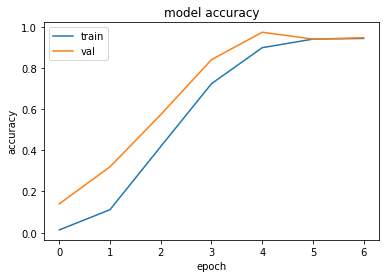

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

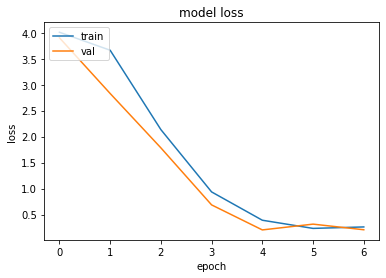

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save('face_recognition_vgg16.model')

INFO:tensorflow:Assets written to: face_recognition_vgg16.model/assets


In [ ]:
new_model = tf.keras.models.load_model('face_recognition_vgg16.model')
predictions = new_model.predict([X_test])
print(predictions)

import numpy as np

print(np.argmax(predictions[1]))

[[1.12179364e-03 1.64995712e-04 4.14400783e-05 ... 4.71484236e-05
  6.12418400e-03 9.42013621e-01]
 [1.70645874e-03 1.74757675e-04 6.96803676e-04 ... 1.12131565e-04
  1.39650982e-03 3.94304865e-04]
 [9.71529007e-05 1.26759498e-03 1.20441309e-05 ... 1.75142418e-06
  1.55590780e-04 1.60496251e-03]
 ...
 [3.93762067e-03 2.52575660e-03 3.60324688e-04 ... 2.05988817e-05
  1.86148111e-03 9.39281192e-04]
 [2.04463882e-04 1.27981648e-05 6.82383961e-06 ... 2.22432709e-06
  9.14885756e-03 4.43287019e-04]
 [1.19927399e-05 4.85508211e-09 5.34594108e-07 ... 2.00332623e-04
  8.54521716e-07 1.67937145e-07]]
32


In [ ]:
plt.imshow(X_test[40]),print(np.argmax(predictions[40]))
plt.show()

In [ ]:
predicted_classes = np.argmax(np.round(predictions),axis=1)

In [ ]:
correct = np.where(predicted_classes==y_test)[0]
print("Found %d correct labels" % len(correct))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
target_names = ["Class {}".format(i) for i in range(50)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

In [ ]:
cm=confusion_matrix(y_test,predicted_classes)
def plot_confusion_matrix(cm,classes,normalize=False,cmap=plt.cm.Blues,title='confusion matrix'):
  plt.gcf().set_size_inches(15,15)
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm=cm.astype('float'/cm.sum(axis=1)[:,np.newaxis])
    print("normalized confusion matrix")
  else:
    print('confusion matrix without normalization')

  print(cm)

  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(i,j,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel("true label")
  plt.xlabel("Predicted label")


confusion matrix without normalization
[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]


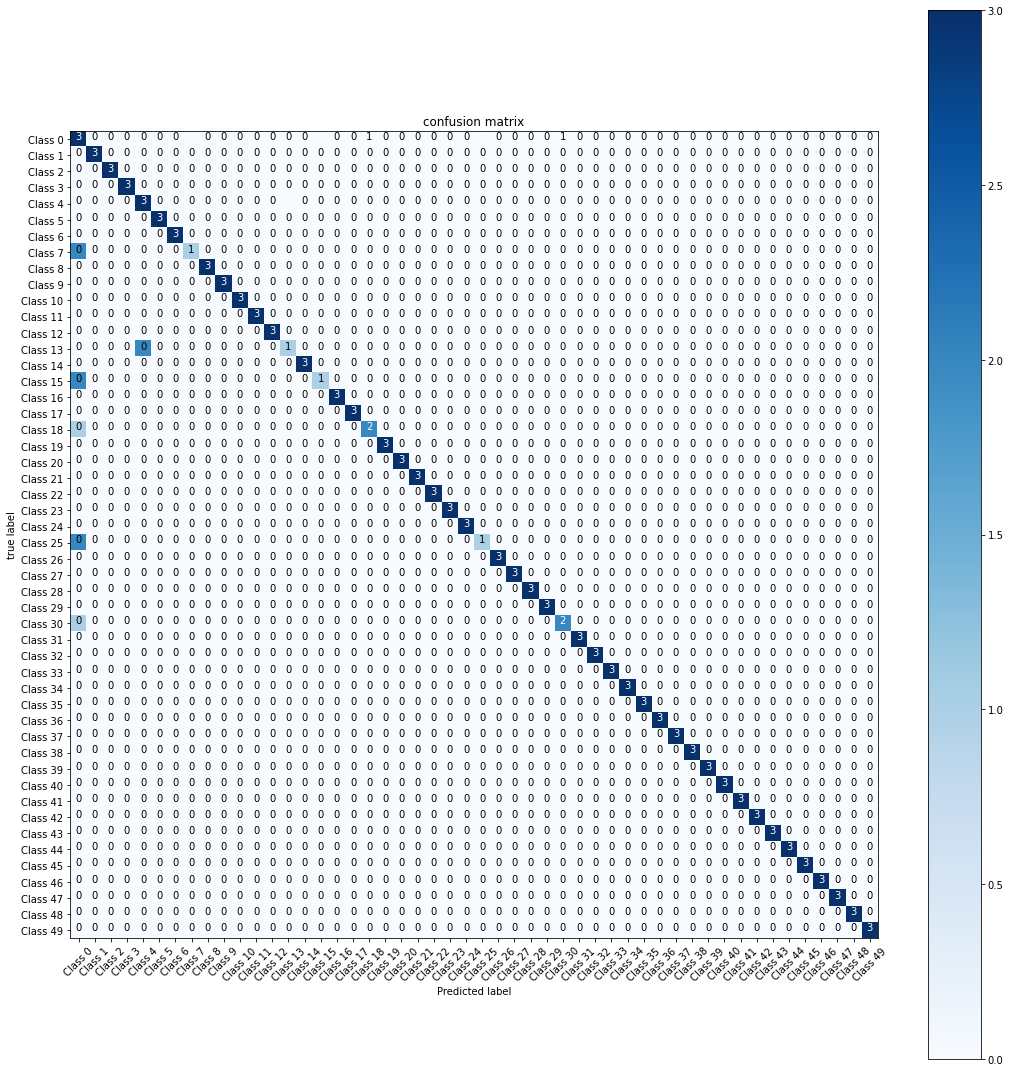

In [ ]:
import itertools
plot_confusion_matrix(cm,target_names)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


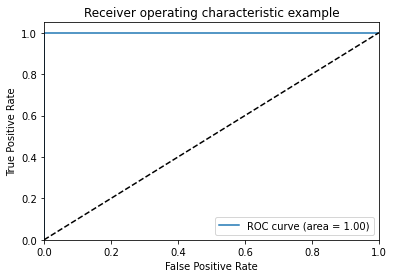

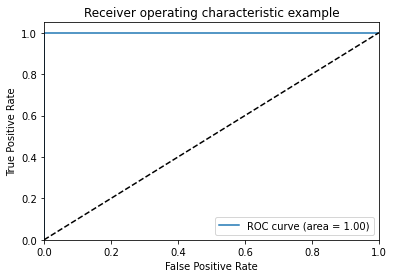

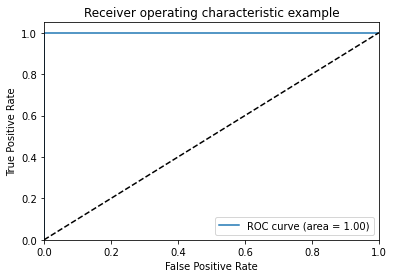

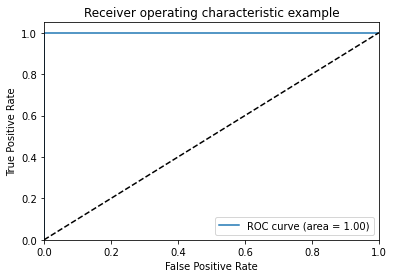

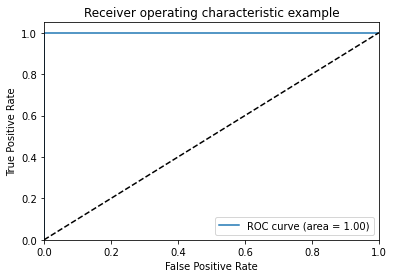

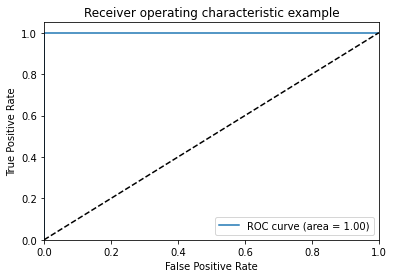

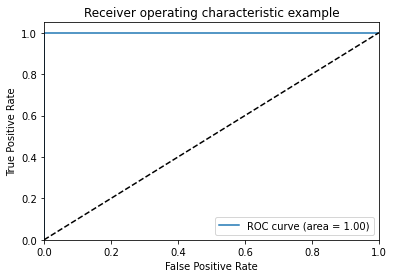

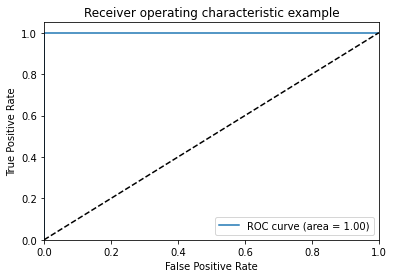

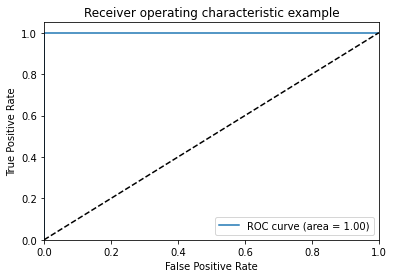

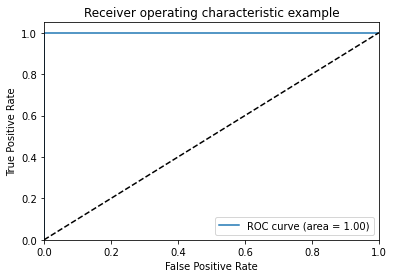

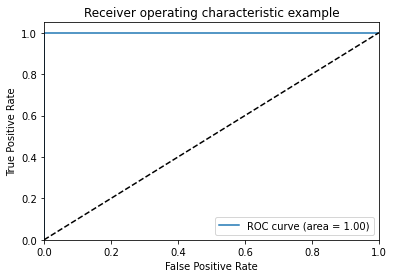

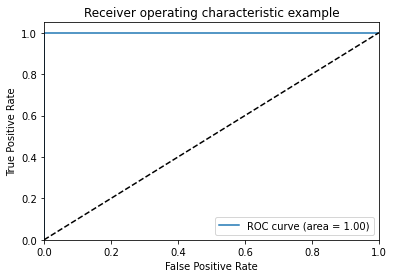

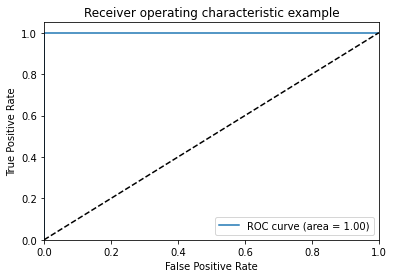

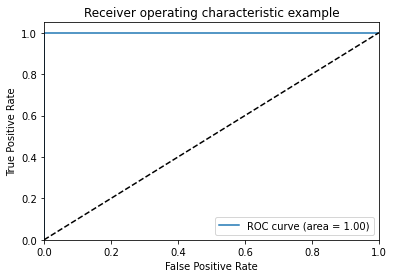

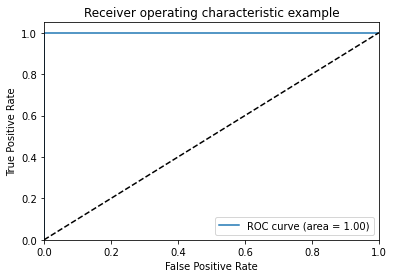

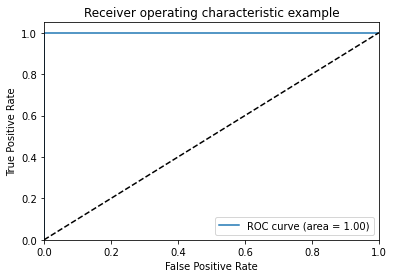

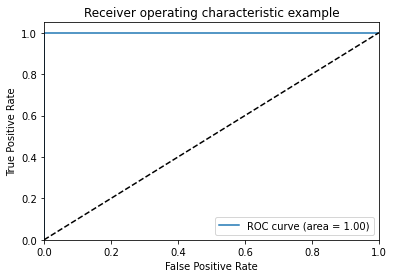

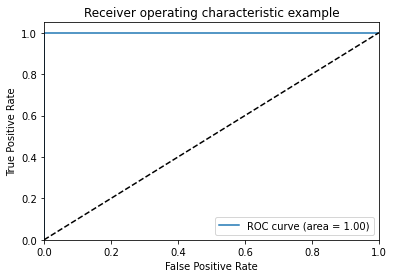

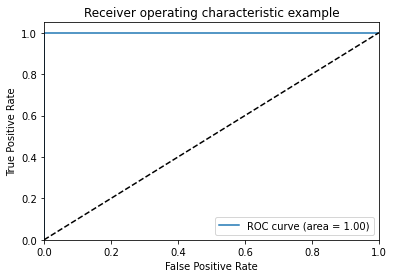

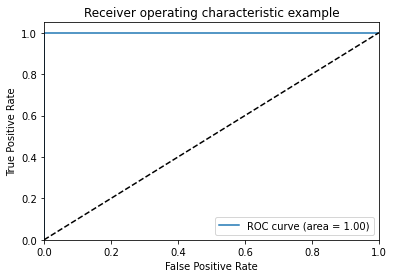

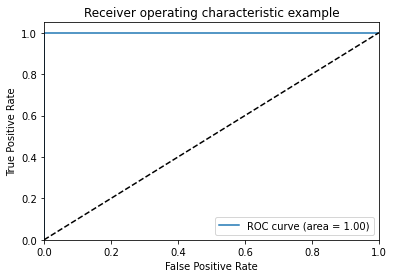

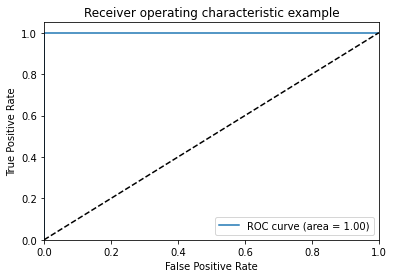

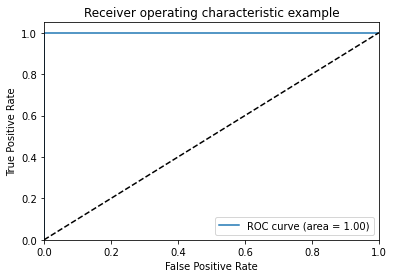

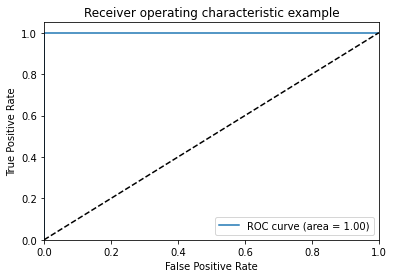

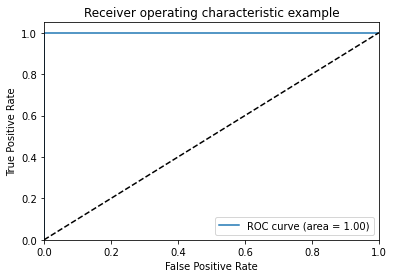

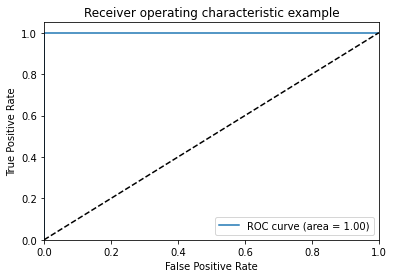

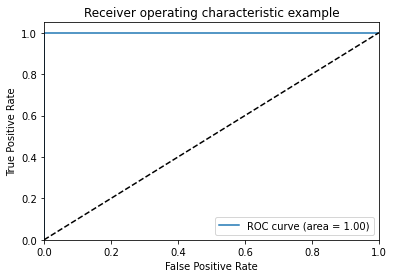

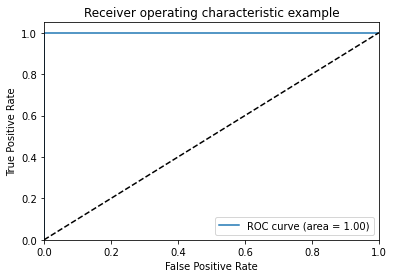

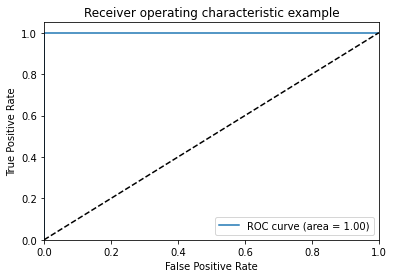

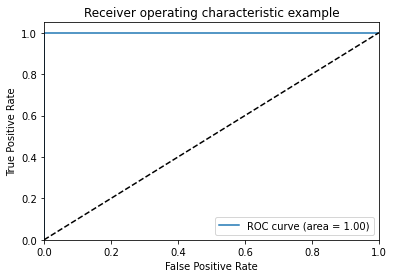

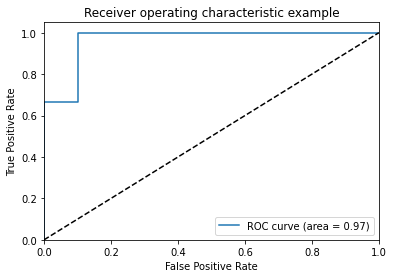

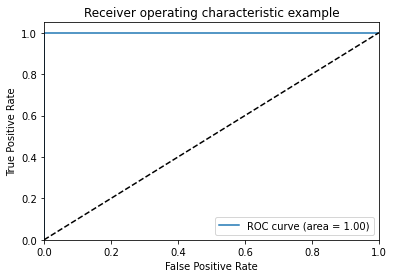

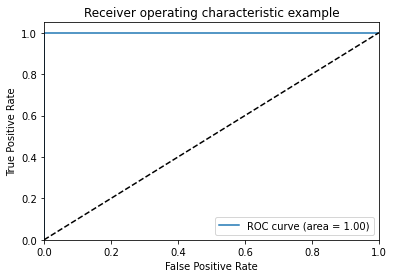

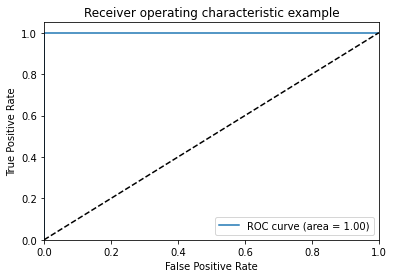

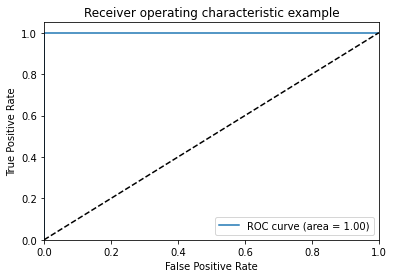

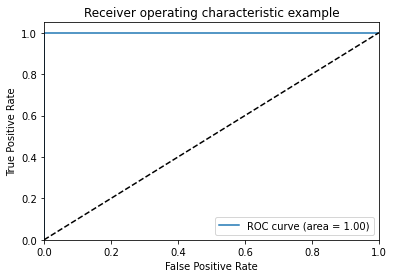

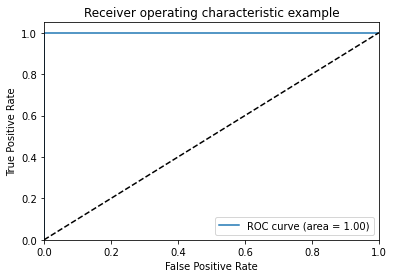

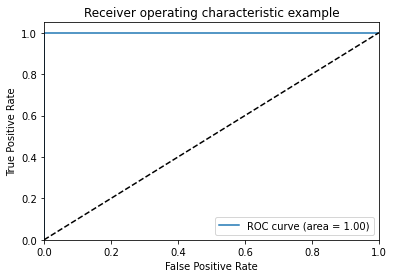

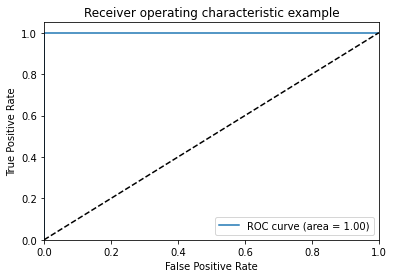

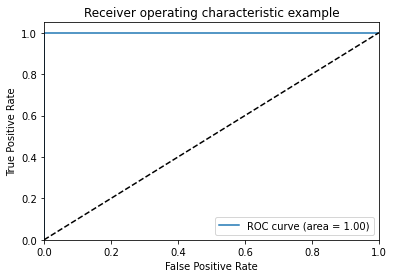

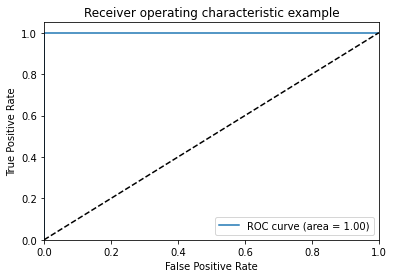

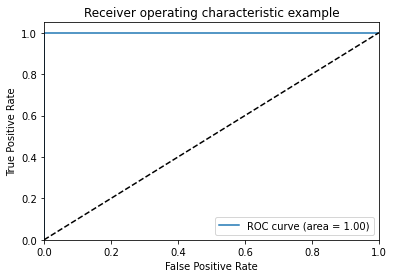

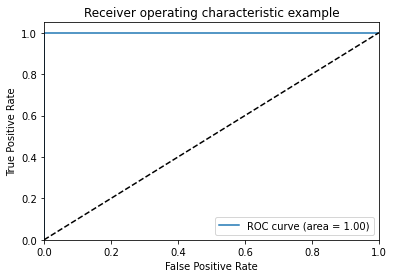

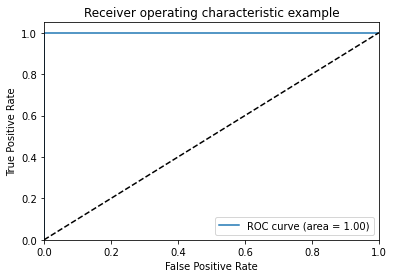

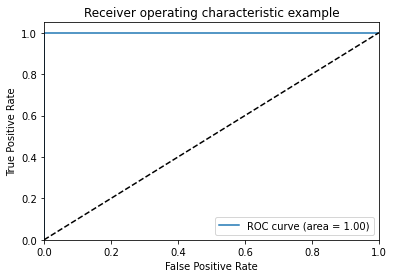

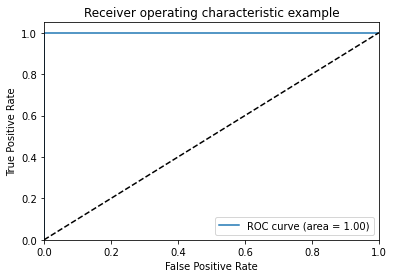

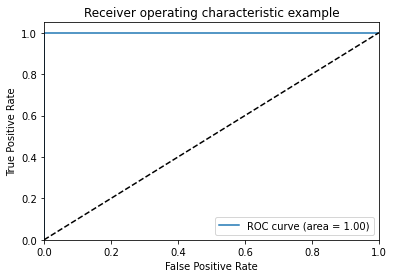

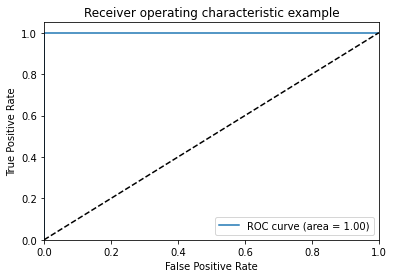

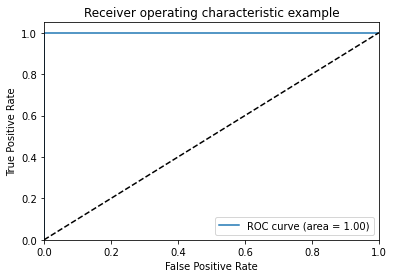

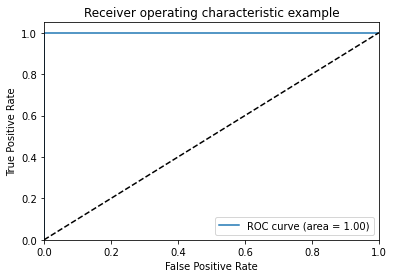

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = new_model.predict_proba(X_test)
n_classes=50
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if __name__ == '__main__':


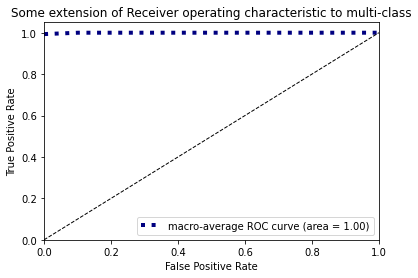

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if __name__ == '__main__':


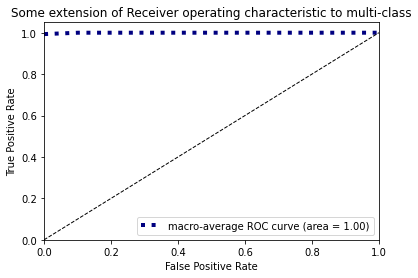

In [ ]:
from scipy import interp
from itertools import cycle
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])



plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)



plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
target_names = ["Class {}".format(i) for i in range(50)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.27      1.00      0.43         3
     Class 1       1.00      1.00      1.00         3
     Class 2       1.00      1.00      1.00         3
     Class 3       1.00      1.00      1.00         3
     Class 4       0.60      1.00      0.75         3
     Class 5       1.00      1.00      1.00         3
     Class 6       1.00      1.00      1.00         3
     Class 7       1.00      0.33      0.50         3
     Class 8       1.00      1.00      1.00         3
     Class 9       1.00      1.00      1.00         3
    Class 10       1.00      1.00      1.00         3
    Class 11       1.00      1.00      1.00         3
    Class 12       1.00      1.00      1.00         3
    Class 13       1.00      0.33      0.50         3
    Class 14       1.00      1.00      1.00         3
    Class 15       1.00      0.33      0.50         3
    Class 16       1.00      1.00      1.00         3
    Class 17       1.00    